In [228]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
%matplotlib inline

train_labeled_images = pd.read_csv('train.csv')
test_labeled_images = pd.read_csv('test.csv')

images = train_labeled_images.iloc[:,1:]
labels = train_labeled_images.iloc[:,:1]

images_test= test_labeled_images.iloc[:,1:]
labels_test= test_labeled_images.iloc[:,:1]

m_train=images.values.shape[0]
m_test=images_test.values.shape[0]

In [1]:
def Create_variables(X):
    W = np.random.rand(X.shape[1], 10)
    b = np.random.rand(1, 10)

    return W,b


def Forword(X,Y,W,b):
    Yhat=1-Y*(np.dot(X,W)+b)
    Yhat=np.maximum(Yhat, 0)
    return Yhat

def Backword(Yhat,Y,X,W,b,learning_rate,lamda):
    o_H_v=cp.minimum((Yhat),1)

    dw=-(cp.dot((X).T,Y*o_H_v))
    db=cp.sum((o_H_v*Y),axis=0)

    dW=(dw+cp.sum(lamda*np.absolute(W)))/(Yhat.shape[0])
    dB=(db/(Yhat.shape[0]))
    
    W=W-learning_rate*dW
    b=b-learning_rate*dB
    return W,b

def update(X,Y,W,b,learning_rate,lamda):
    #W=np.reshape(W,(W.shape[0],1))
    #Y=np.reshape(Y,(Y.shape[0],1))
    #b=np.reshape(b,(b.shape[0],1))
    Yhat=Forword(X,Y,W,b)
    [W,b]=Backword(Yhat,Y,X,W,b,learning_rate,lamda)
    cost=Cost_func(Yhat,W,lamda)
    return W,b,cost

def Cost_func(Yhat,W,lamda):
    Cost=(cp.sum(Yhat,axis=0))/(Yhat.shape[0])+np.sum(lamda*np.absolute(W)**2)/(2*Yhat.shape[0])
    Cost=(cp.sum(Cost,axis=0))

    return Cost
def predict(X, W, b):
    A = (cp.dot(X,W)+b)
    return np.argmax(A, axis = 1)

0.8473095238095238


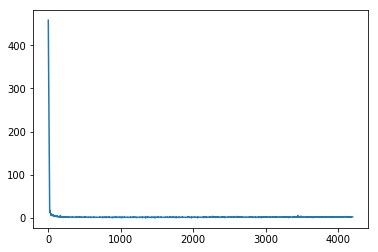

In [250]:
m_for_train=int((m_train))
m_for_test=int((m_test))

learning_rate = 0.1
lamda =0
minibatch_size =1024
iters =100

X_train = images.values[:m_for_train, :] / 256.
Y_train = -1*np.ones((m_for_train, 10), dtype = np.int32)


X_test  = images_test.values[:, :] / 256.
Y_test  = -1*np.ones((m_for_test, 10), dtype = np.int32)

for i in range(m_for_train):
    Y_train[i, labels.values[i, :]] = 1
    
for j in range(m_for_test):
    Y_test [j, labels_test.values[j, :]] = 1

[W,b]=Create_variables(X_train)

scores = np.array([])
J=0
for epoch in range(iters):
    order = np.random.permutation(m_for_train)
    epoch_score = 0
    
    for i in range(0, m_for_train, minibatch_size):
        
            
        W, b, J = update(X_train[order[i : i + minibatch_size],:],\
                         Y_train[order[i : i + minibatch_size],:],\
                         W, b, (0.9995**epoch)*learning_rate, lamda )
            
        #epoch_score += J
        
        scores = np.append(scores, J)

plt.plot(scores)    

print(np.sum(predict(X_train , W, b) == labels.values[:,0]) / m_for_train)
